<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/BianHill_U3Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 Project: The Right Likelihood for the Job

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit3NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


# My Code

I did my model based on the Stanford Women's Waterpolo Team and the amount of points they scored over the past two seasons to find the most likely points scored in a game. I chose this to do my project on because I joined the waterpolo team this year and I really like the sport.

In [11]:
!pip install "preliz[full,notebook]"

import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


uploaded data on points from a google sheet

(array([ 3.,  8., 14.,  6.,  1.,  5.,  5.,  5.,  3.,  1.]),
 array([ 7. ,  8.8, 10.6, 12.4, 14.2, 16. , 17.8, 19.6, 21.4, 23.2, 25. ]),
 <BarContainer object of 10 artists>)

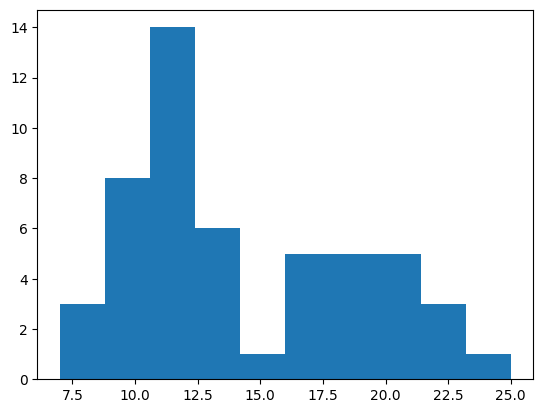

In [12]:
url_WPPoints = "https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Stanford%20Women's%20Waterpolo%20Goals%20(2023-2024)%20data%20only.csv"
data_WP = pd.read_csv(url_WPPoints)
plt.hist(data_WP)

Creating my priors, chose 7 and 25 because the minimum is around 7 and the maximum is around 25. From this we can assume that our mean will be somewhere between these two numbers because it would be impossible to be outside of this range. You can't get an average or probability outside of the range of data.

In [13]:
with pm.Model() as model_WPPointsN:
    μ = pm.Uniform('μ', lower=7, upper=25)
  #only the positive half of the normal distribution, as the normal distribution supports -inf to +inf
    σ = pm.HalfNormal('σ', sigma=5)
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_WP)
    idata_WPPointsN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

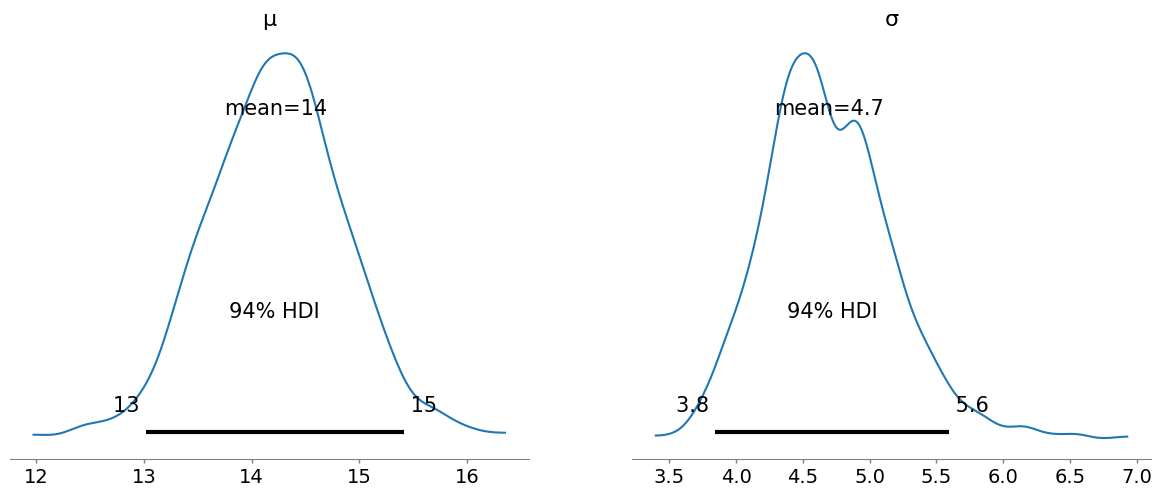

In [14]:
az.plot_posterior(idata_WPPointsN)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

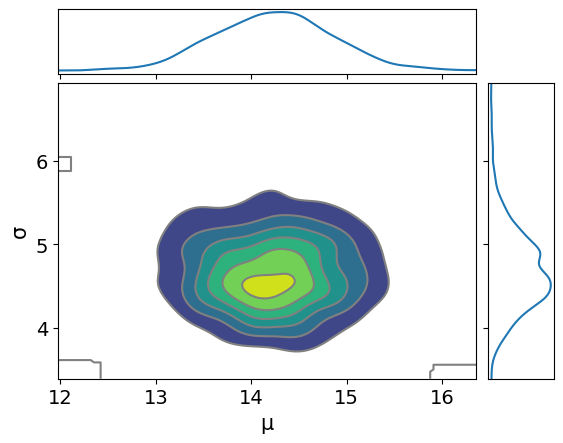

In [15]:
#which pair of μ  and σ our model recommends
az.plot_pair(idata_WPPointsN, kind='kde', marginals=True)

This shows that our mean is actually somewhere between 4.7 and 14.

Output()

<Axes: xlabel='Y'>

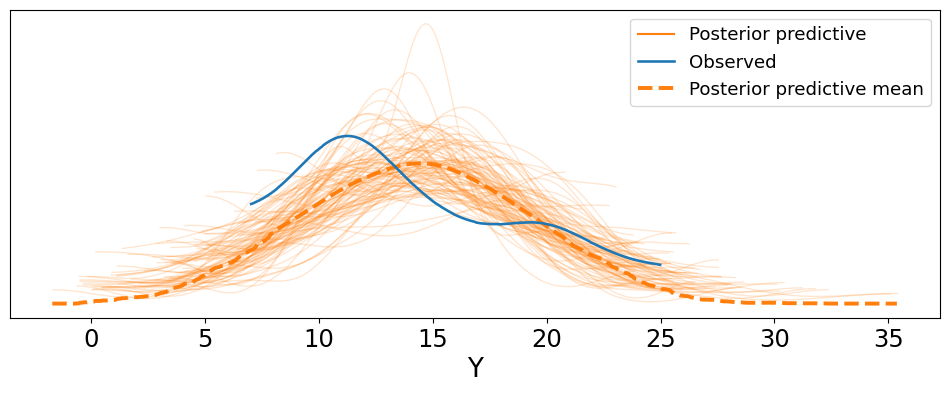

In [16]:
pm.sample_posterior_predictive(idata_WPPointsN, model=model_WPPointsN, extend_inferencedata=True)
az.plot_ppc(idata_WPPointsN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This isn't the worst possible model, it shows the movement of the graph well, but it shifts everything right. The posterior predictive mean shows the peak at around 15 ish, while the observed data shows that it should be a little closer to 10. Because of this, I changed my likelihood to a skew normal from a normal distribution in an attempt to get a model that better fits reality. I'll keep my priors the same since the model wasn't that far off and just let the new likelihood make its adjustments.

(array([ 3.,  8., 14.,  6.,  1.,  5.,  5.,  5.,  3.,  1.]),
 array([ 7. ,  8.8, 10.6, 12.4, 14.2, 16. , 17.8, 19.6, 21.4, 23.2, 25. ]),
 <BarContainer object of 10 artists>)

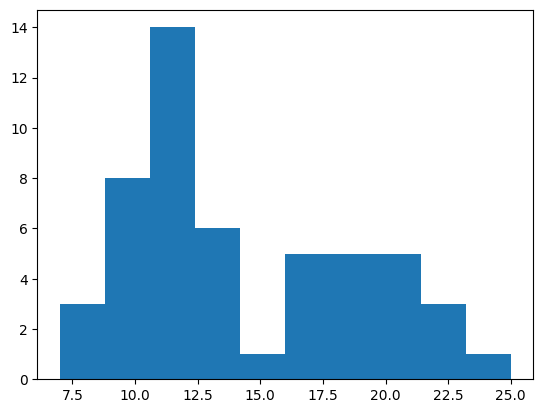

In [17]:
url_WPPoints = "https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Stanford%20Women's%20Waterpolo%20Goals%20(2023-2024)%20data%20only.csv"
data_WP = pd.read_csv(url_WPPoints)
plt.hist(data_WP)

Testing skew normal model

In [18]:
#Skew Normal Model
with pm.Model() as model_WPPointsSN:
    μ = pm.Uniform('μ', lower=7, upper=25)
    σ = pm.HalfNormal('σ', sigma=5)

    #Allows the model to skew towards the positive numbers or the negative numbers
    α = pm.Exponential('α', lam = 1/2)
    y = pm.SkewNormal('y', mu=μ, sigma=σ, alpha = α, observed=data_WP)
    idata_WPPointsSN = pm.sample()

Output()

Output()

In [19]:
pm.sample_posterior_predictive(idata_WPPointsSN, model=model_WPPointsSN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

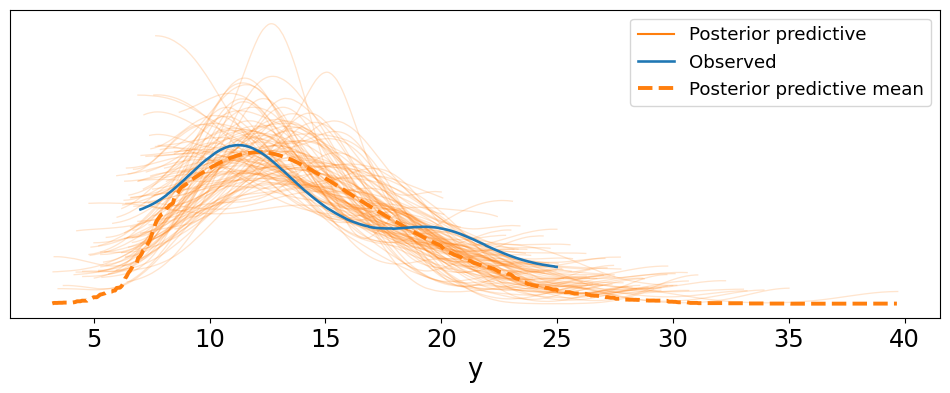

In [20]:
az.plot_ppc(idata_WPPointsSN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Model has observed and mean at around the same point. Model represents the higher amount of data around 10-15 and follows the relative pattern of the rest of the data. The mean of the model is represented by the mu variable which is somewhere between 13 and 15. Based on the data which had a large peak between 10-12.5 but has to take into account the other data, a mean of ~14 is reasonable and around the initial prediction of between 4.4 and 14. In a skew normal model, using the posterior to find the mean doesn't work, so we don't have an exact number but we have an about answer which is between 13 and 15.

The dip around 15ish can be ignored relative to our posterior predictive mean as it's increasingly likely that the team will either score very few points or a lot of points since they'll be playing a team that much better than them or not as good as them. A team that relatively evenly matched is very unlikely, so we can assume that the data in the middle is just random chance and not relevant to our mean. Similarly, the dip does reflect reality or our raw data. In the histogram, we see a the most data between 10 and 12.5, a medium amount between ~16 and 21, and a sudden dip around 15. Our observed data matches this trend very well.



array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'μ'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

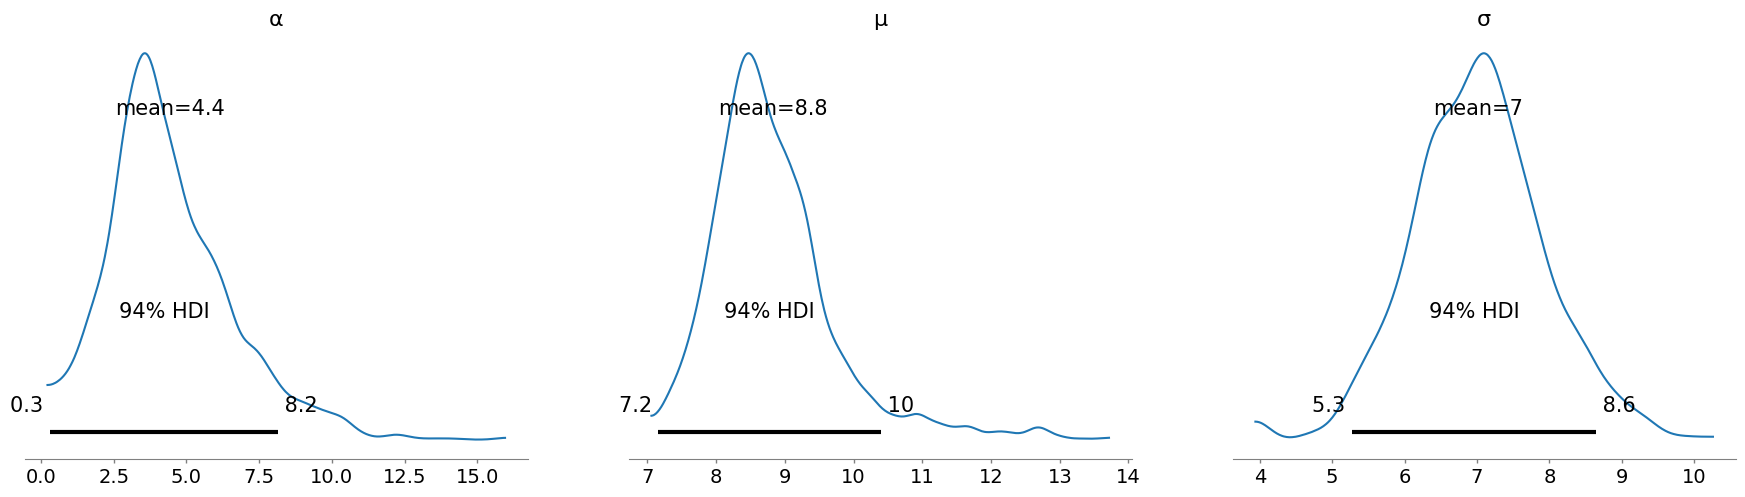

In [21]:
az.plot_posterior(idata_WPPointsSN)

Just testing other models below for fun

Skew T Model

In [22]:
#Skew T
with pm.Model() as model_WPPointsST:
    μ = pm.Uniform('μ', lower=7, upper=25)
    σ = pm.Uniform('σ', lower=7, upper=25)
    a = pm.Uniform('a', lower=5, upper=8)
    b = pm.Uniform('b', lower=1, upper=4)
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=data_WP)
    idata_WPPointsST = pm.sample()

Output()

Output()

In [23]:
pm.sample_posterior_predictive(idata_WPPointsST, model=model_WPPointsST, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 30.0)

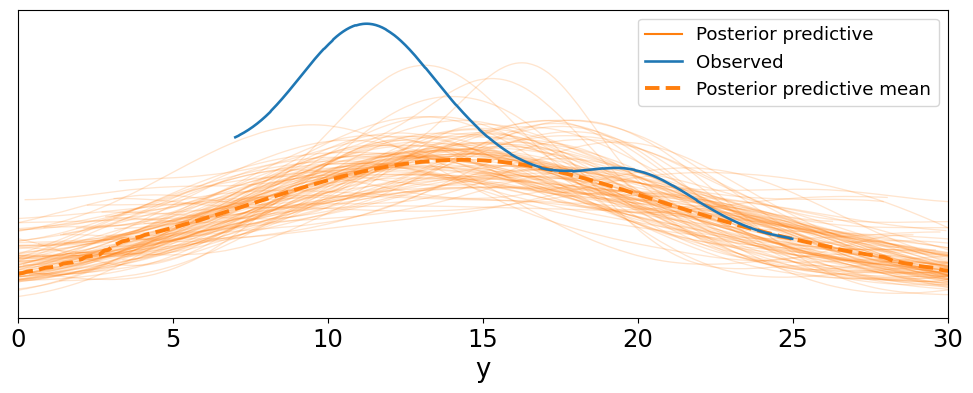

In [24]:
ax = az.plot_ppc(idata_WPPointsST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 30)

Not good

- The posterior predictive mean shows a very gradual curve, something by observed data doesn't

- The posterior predictive mean barely even touches the observed data